In [24]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tikzplotlib

plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
class Worker:
    def __init__(self, id, x_0, u, A, group):
        self.id = id
        self.x = []
        self.x.append(x_0)
        self.A = A
        self.group = group
        self.employed = u

In [3]:
from scipy import stats
# def job_matching_algorithm(unemployed_list,t):
#     best_worker_score = 0
#     best_worker_id = -1
#     for worker in unemployed_list:
#         if (worker.x[t-1] > best_worker_score):
#             best_worker_score = worker.x[t-1]
#             best_worker_id    = worker.id
#     return best_worker_id

def job_matching_algorithm(unemployed_list,t):
    best_worker_score = 0
    best_worker_id = -1
    worker_ids = []
    worker_prob = []
    for worker in unemployed_list:
        worker_ids.append(worker.id)
        worker_prob.append(worker.x[t-1])
    worker_prob = worker_prob/sum(worker_prob)
    custm = stats.rv_discrete(name='custm', values=(worker_ids, worker_prob))
    if (len(unemployed_list)>0):
        best_worker_id = custm.rvs(size=1)
    return best_worker_id[0]


def time_step(workers, t, vacant):
    unemployed_list = []
    for worker in workers:
        if (worker.employed == 1):
            if (random.random() > worker.A):
                worker.employed = 0
                vacant +=1
        else:
            unemployed_list.append(worker)
    new_vacant = vacant
    for position in range(vacant):
        worker_id = job_matching_algorithm(unemployed_list,t)
        if (worker_id != -1):
            workers[worker_id].employed = 1
            new_vacant -= 1
            for i in range(len(unemployed_list)):
                if (unemployed_list[i-1].id == worker_id):
                    del unemployed_list[i-1]
    for worker in workers:
        worker.x.append(worker.x[t-1]+worker.employed)
                
    return workers, new_vacant

In [4]:
N_1 = 10000
N_2 = 1000
vacant = 50
T = 100

# Initialize the conditions for group 1
x_1 = 10*(np.ones(N_1)-(np.random.power(5, N_1)))
A_1 = np.ones(N_1)-(np.random.power(3, N_1))
u_1 = np.zeros((N_1), dtype='int')

workers = []
for i in range(N_1):
    workers.append(Worker(i, x_1[i], u_1[i], A_1[i],0))

# Initialize the conditions for group 2 (disadvantage group)
x_2 = 10*(np.ones(N_2)-(np.random.power(10, N_2)))
A_2 = np.ones(N_2)-(np.random.power(3, N_2))
u_2 = np.zeros((N_2), dtype='int')

for i in range(N_2):
    workers.append(Worker(N_1+i, x_2[i], u_2[i], A_2[i],1))

# Run dynamics
for t in range(1,T):
    workers, vacant = time_step(workers, t, vacant)


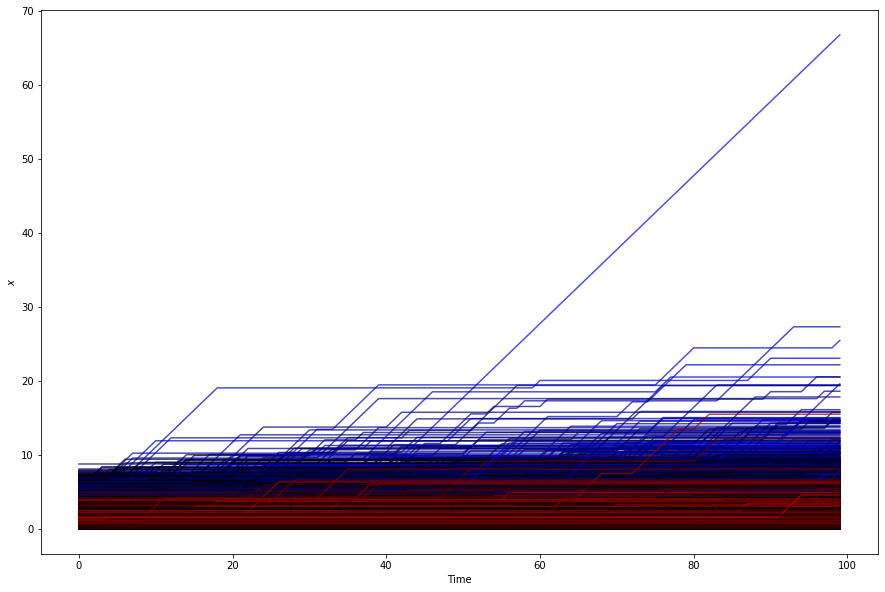

In [13]:
for i in range(N_1+N_2):
    plt.plot(range(0,T),workers[i].x, color=[workers[i].A*(workers[i].group), 0, workers[i].A*(1-workers[i].group)], alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('$x$')

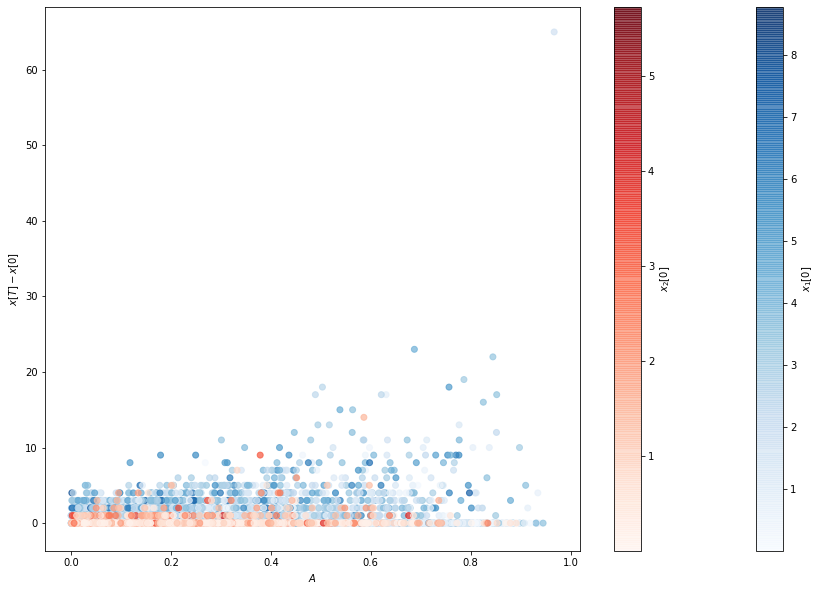

In [42]:
x_1_final = []
x_2_final = []
for worker in workers:
    if (worker.group == 0):
        x_1_final.append(worker.x[len(worker.x)-1])
    else:
        x_2_final.append(worker.x[len(worker.x)-1])
plt.scatter(A_1, x_1_final-x_1, c=x_1, cmap='Blues', alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('$x_1[0]$')
plt.scatter(A_2, x_2_final-x_2, c=x_2, cmap='Reds', alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('$x_2[0]$')
plt.xlabel('$A$')
plt.ylabel('$x[T]-x[0]$')
plt.savefig('figures/x0_A_50.pdf')
#tikzplotlib.save('figures/x0_A_50.tikz')

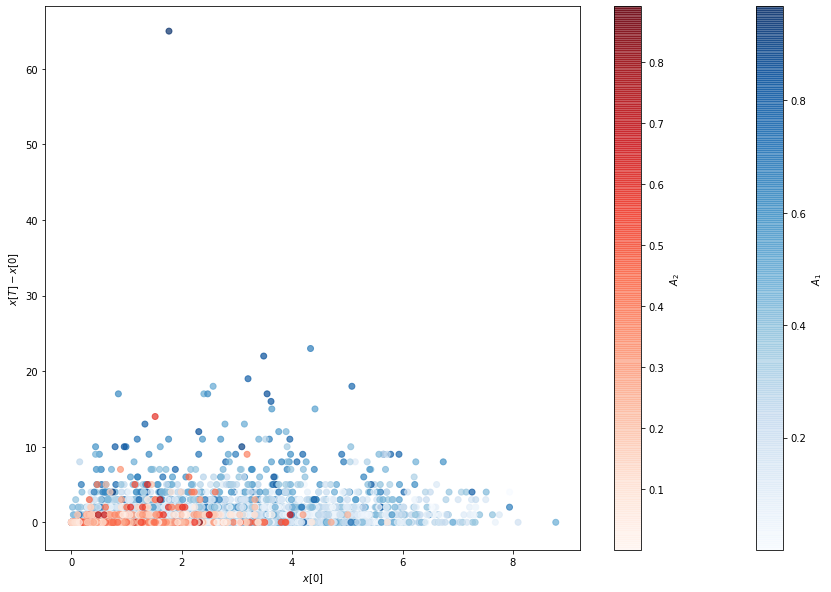

In [43]:
plt.scatter(x_1, x_1_final-x_1, c=A_1, cmap='Blues', alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('$A_1$')
plt.scatter(x_2, x_2_final-x_2, c=A_2, cmap='Reds', alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('$A_2$')
plt.xlabel('$x[0]$')
plt.ylabel('$x[T]-x[0]$')
plt.savefig('figures/x0_xF_50.pdf')
#tikzplotlib.save('figures/x0_xF_50.tikz')

Text(0.5, 0, '$A$')

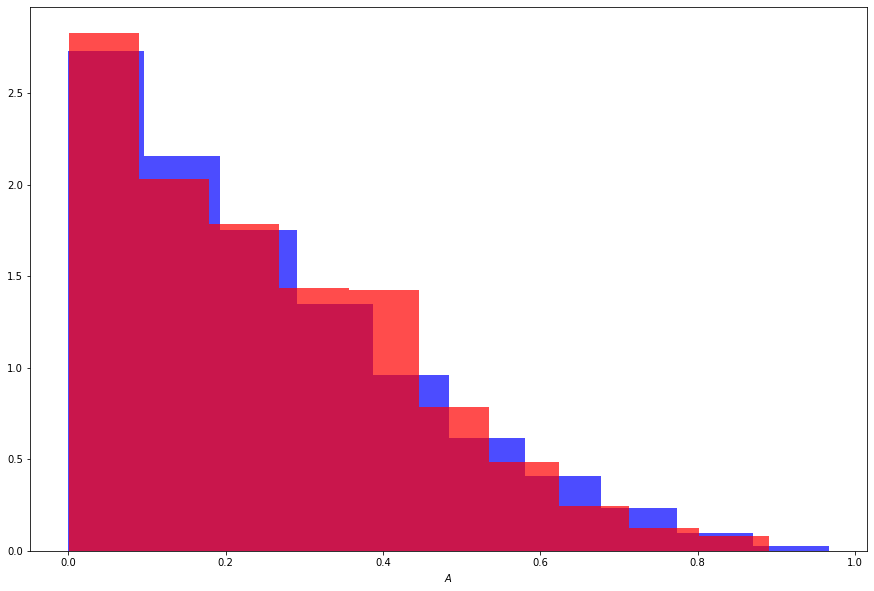

In [21]:
plt.hist(A_1, color='b', alpha=0.7, density=True)
plt.hist(A_2, color='r', alpha=0.7, density=True)
plt.xlabel('$A$')

Text(0.5, 0, '$x_0$')

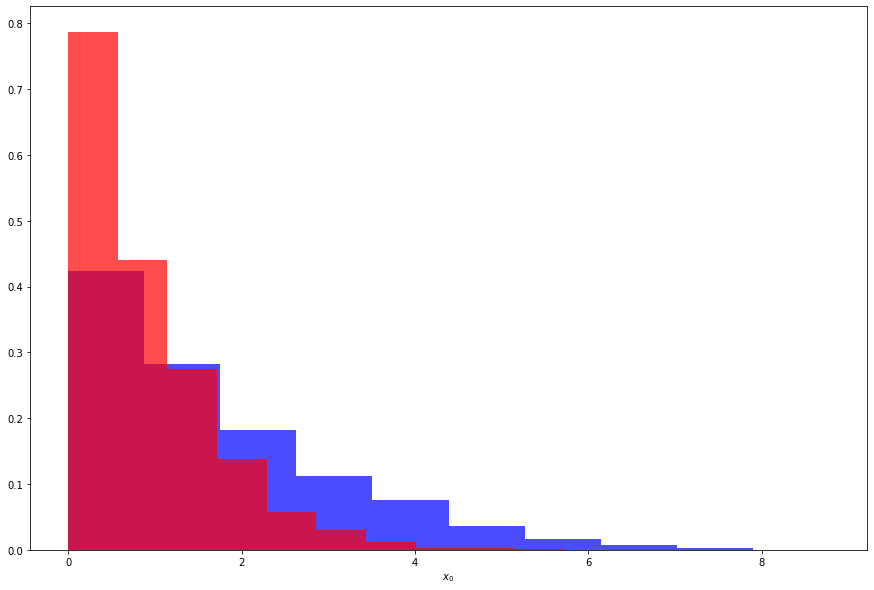

In [20]:
plt.hist(x_1, color='b', alpha=0.7, density=True)
plt.hist(x_2, color='r', alpha=0.7, density=True)
plt.xlabel('$x_0$')

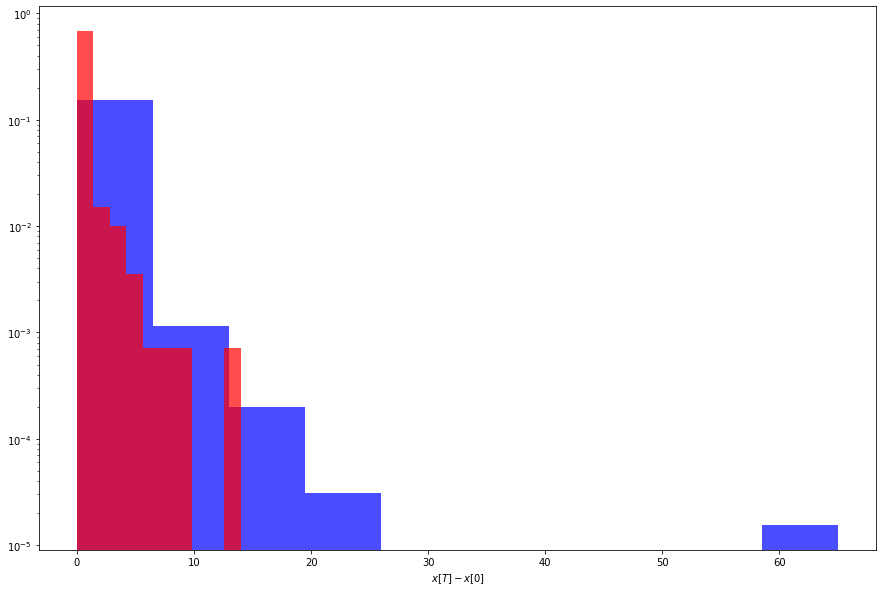

In [44]:
plt.hist(x_1_final-x_1, color='b', alpha=0.7, density=True)
plt.hist(x_2_final-x_2, color='r', alpha=0.7, density=True)
plt.yscale('log')
plt.xlabel('$x[T]-x[0]$')
#tikzplotlib.save('figures/hist_50.tikz')
plt.savefig('figures/hist_50.pdf')